In [61]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline



In [62]:
data = pd.read_csv('D:/ad.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [64]:
edit_cols = ['country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    data.loc[data[col] == '?', col] = 'unknown'

In [65]:
for col in edit_cols:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in country: 0
? in occupation: 0
? in workclass: 0


In [68]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']


data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

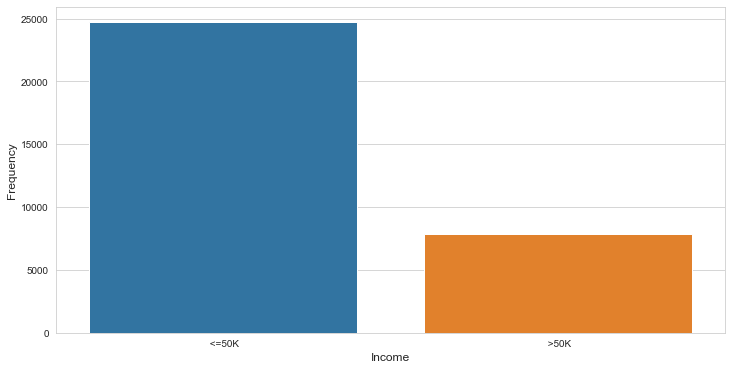

In [69]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'salary', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [70]:
#Separate categorical and numberical columns
cat_col = data.dtypes[data.dtypes == 'object']
num_col = data.dtypes[data.dtypes != 'object']

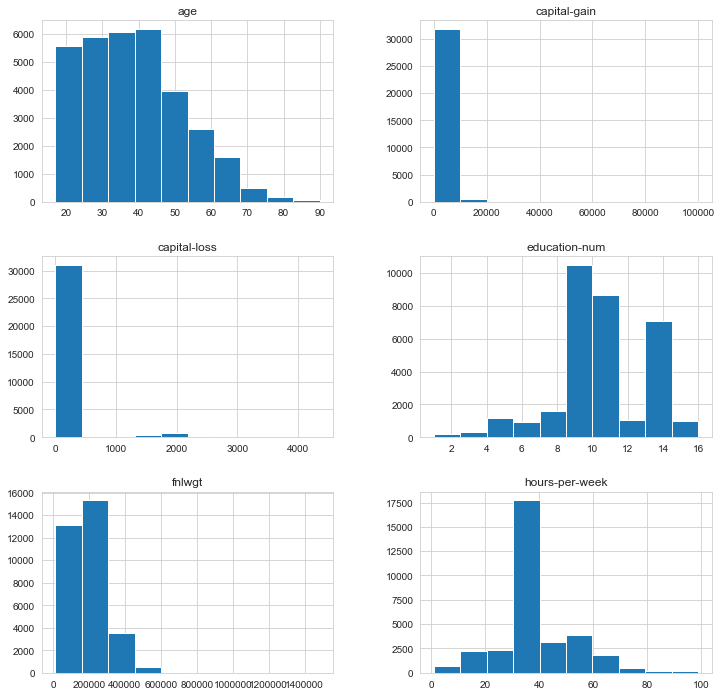

In [71]:
data[list(num_col.index)].hist(figsize = (12,12));

In [72]:
capital_loss_data = data[data['capital-loss']>0]
capital_gain_data = data[data['capital-gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_data.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_data.shape}")
print(f"Percentage of people having capital gain greater than median value: {(data.loc[data['capital-gain'] > 0,:].shape[0] / data.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(data.loc[data['capital-loss'] > 0,:].shape[0] / data.shape[0])*100:.4f}%")


Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%
